In [5]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [306]:
#Load image và convert sang image gray
im = cv2.imread("./car/IMG_0392.jpg")
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
# lọc nhiễu bằng bilateralFilter mục đích lọc này là làm tăng strengt cho edge trên image
noise_removal = cv2.bilateralFilter(im_gray,9,75,75)
# Cân bằng lại histogram của ảnh 
equal_histogram = cv2.equalizeHist(noise_removal)
#  Morphogoly open mục đích là làm tăng dilation của edge và giảm edge nhiễu
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
morph_image = cv2.morphologyEx(equal_histogram,cv2.MORPH_OPEN,kernel,iterations=20)
# subtract image
sub_morp_image = cv2.subtract(equal_histogram,morph_image)
# dùng threshold OSTU
ret,thresh_image = cv2.threshold(sub_morp_image,0,255,cv2.THRESH_OTSU)
# Dùng canny
canny_image = cv2.Canny(thresh_image,250,255)
# dilation
kernel = np.ones((3,3), np.uint8)
dilated_image = cv2.dilate(canny_image,kernel,iterations=1)
#
new,contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours= sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None
for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.06 * peri, True) 
    if len(approx) == 4:
            screenCnt = approx
            break
#final = cv2.drawContours(im, [screenCnt], -1, (0, 255, 0), 3)

In [307]:
(x,y,w,h) = cv2.boundingRect(screenCnt)
roi = im[y:y+h,x:x+w]

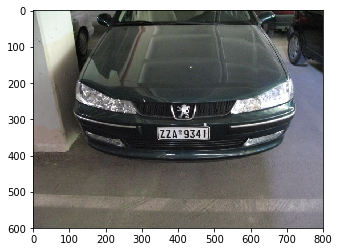

In [308]:
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

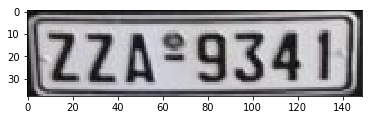

In [309]:
plt.imshow(cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

In [236]:
roi_gray = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
roi_blur = cv2.GaussianBlur(roi_gray,(3,3),1)

In [237]:
ret,thre = cv2.threshold(roi_blur,120,255,cv2.THRESH_BINARY_INV)
#cany = cv2.Canny(thre,250,255)

In [238]:
ker = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
thre_mor = cv2.morphologyEx(thre,cv2.MORPH_DILATE,ker)

In [239]:
cv2.imshow("im3",thre_mor)
cv2.imshow("im2",roi)
cv2.waitKey()
cv2.destroyAllWindows()

In [240]:
_,cont,hier = cv2.findContours(thre_mor,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
#dr = cv2.drawContours(roi,cont,-1,(0,255,0))

In [241]:
len(cont)

15

In [296]:
areas_ind = {}
areas = []
for ind,cnt in enumerate(cont) :
    area = cv2.contourArea(cnt)
    areas_ind[area] = ind
    areas.append(area)
    

In [298]:
areas = sorted(areas,reverse=True)[2:9]
areas 


[261.0, 215.0, 203.0, 197.5, 194.5, 184.5, 103.5]

In [290]:
#cnt = sorted(areas.items(),key = lambda x:x[1],reverse=True)

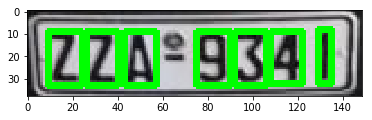

In [310]:
for i in areas:
    (x,y,w,h) = cv2.boundingRect(cont[areas_ind[i]])
    cv2.rectangle(roi,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

In [311]:
cv2.imshow("im3",roi)
cv2.waitKey()
cv2.destroyAllWindows()